In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
data = pd.read_csv('/content/heart_attack_dataset.csv')

# Data Processing

> 


In [ ]:
data.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,female,3.0,145,233,1,0,150,0,2.3,0.0,0.0,1.0,yes
1,1,37,female,2.0,130,250,0,1,187,0,3.5,0.0,0.0,2.0,yes
2,2,41,male,1.0,130,204,0,0,172,0,1.4,2.0,0.0,2.0,yes
3,3,56,female,1.0,120,236,0,1,178,0,0.8,2.0,0.0,2.0,yes
4,4,57,male,0.0,120,354,0,1,163,1,0.6,2.0,0.0,2.0,yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    object 
 3   cp          298 non-null    float64
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       302 non-null    float64
 12  ca          298 non-null    float64
 13  thal        302 non-null    float64
 14  target      303 non-null    object 
dtypes: float64(5), int64(8), object(2)
memory usage: 35.6+ KB


## Remove null values

>  



In [ ]:
data.isna().sum()

Unnamed: 0    0
age           0
sex           0
cp            5
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         1
ca            5
thal          1
target        0
dtype: int64

In [ ]:
data.describe()

,Unnamed: 0,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,298.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,302.000000,298.000000,302.000000
mean,151.000000,54.366337,0.979866,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.403974,0.734899,2.311258
std,87.612784,9.082101,1.034553,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.611939,1.025035,0.612011
min,0.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.500000,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,151.000000,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,226.500000,61.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,302.000000,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [ ]:
# remove un-neaded feature
data.drop("Unnamed: 0",axis=1,inplace=True)

In [ ]:
# fill null values with meam
data["cp"] = data["cp"].fillna(data["cp"].mean())
data["ca"] = data["ca"].fillna(data["ca"].mean())

In [ ]:
# remove 1 null value from slope and thal 
data.dropna(how="any",inplace=True)

In [ ]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Replace str values to numbers




In [ ]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
# note: there is another way to convert str to nums "label encoder" but this way to know what new value mean 
data['sex'] = data['sex'].map({'female':0,'male':1})

In [ ]:
data['target'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
data['target'] = data['target'].map({'yes':1,'no':0})

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,0,3.0,145,233,1,0,150,0,2.3,0.0,0.0,1.0,1
1,37,0,2.0,130,250,0,1,187,0,3.5,0.0,0.0,2.0,1
2,41,1,1.0,130,204,0,0,172,0,1.4,2.0,0.0,2.0,1
3,56,0,1.0,120,236,0,1,178,0,0.8,2.0,0.0,2.0,1
4,57,1,0.0,120,354,0,1,163,1,0.6,2.0,0.0,2.0,1


## Show correlation

>  



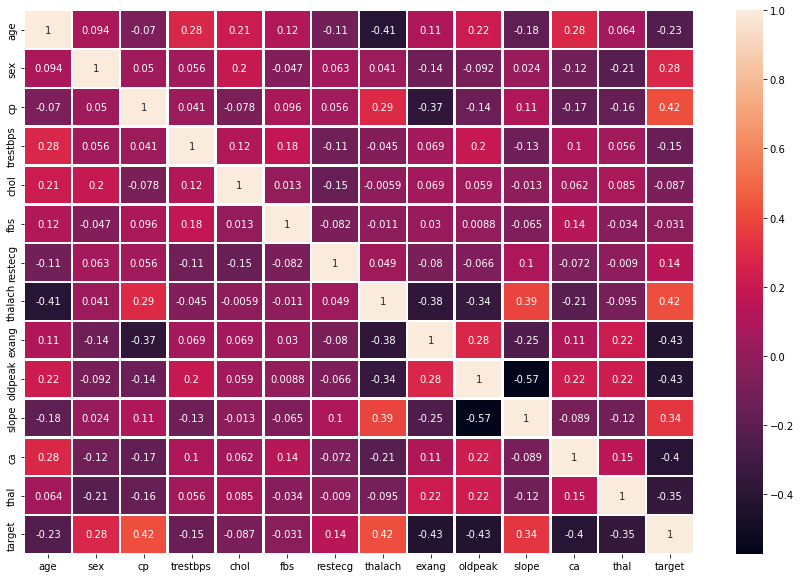

In [ ]:
plt.pyplot.figure(figsize = (15,10))
sns.heatmap(data.corr(), annot= True, linewidths= 1.5)

# SVC

> 



In [ ]:
output = data.pop('target')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, output, test_size=0.3, random_state=32)

In [ ]:
x_train.shape, y_train.shape

((210, 13), (210,))

In [ ]:
# choose the best keranl type
clf = svm.SVC()
param_grid = {'kernel': ['linear', 'rbf', 'poly']}
model = GridSearchCV(clf, param_grid, cv = 5)
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'kernel': ['linear', 'rbf', 'poly']})

In [ ]:
model.best_params_

{'kernel': 'linear'}

In [ ]:
model.best_score_

0.8285714285714285

In [ ]:
# choose the best C value
clf = svm.SVC(kernel= 'linear')
param_grid = {'C': np.arange(1,5)}
model = GridSearchCV(clf, param_grid, cv = 5)
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': array([1, 2, 3, 4])})

In [ ]:
model.best_params_

{'C': 1}

In [ ]:
model.best_score_

0.8285714285714285

In [ ]:
# all model score 
cv_scores = cross_val_score(clf, data, output, cv=5)
print(cv_scores)
print("score mean:{}".format(np.mean(cv_scores)) )

[0.81967213 0.88333333 0.81666667 0.85       0.76666667]
score mean:0.8272677595628416


In [ ]:
clf.fit(x_train, y_train)

SVC(kernel='linear')

## Model evaluation

> 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


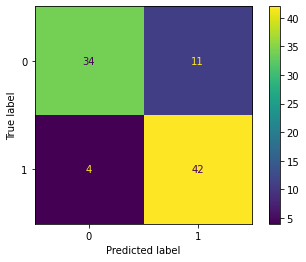

In [ ]:
plot_confusion_matrix(clf, x_test, y_test)

In [ ]:
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred, target_names=["yes", "no"]))

              precision    recall  f1-score   support

         yes       0.89      0.76      0.82        45
          no       0.79      0.91      0.85        46

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



# KNN with MinMaxScaler

> 



In [ ]:
scaled = MinMaxScaler().fit_transform(data)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(scaled, output, test_size=0.3, random_state=32)

In [ ]:
# choose the best numder of neighbors
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1,5)}
model = GridSearchCV(knn, param_grid, cv = 5)
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4])})

In [ ]:
model.best_params_

{'n_neighbors': 4}

In [ ]:
model.best_score_

0.7809523809523811

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 4)
cv_scores = cross_val_score(knn, scaled, output, cv=5)
print(cv_scores)
print("score mean:{}".format(np.mean(cv_scores)) )

[0.85245902 0.85       0.76666667 0.8        0.76666667]
score mean:0.8071584699453552


In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


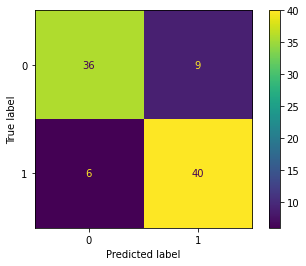

In [ ]:
plot_confusion_matrix(knn, x_test, y_test)

In [ ]:
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred, target_names=["yes", "no"]))

              precision    recall  f1-score   support

         yes       0.00      0.00      0.00        45
          no       0.51      1.00      0.67        46

    accuracy                           0.51        91
   macro avg       0.25      0.50      0.34        91
weighted avg       0.26      0.51      0.34        91



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no pred

# KNN with StandardScaler

In [ ]:
scaled = StandardScaler().fit_transform(data)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(scaled, output, test_size=0.3, random_state=32)

In [ ]:
# choose the best numder of neighbors
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1,5)}
model = GridSearchCV(knn, param_grid, cv = 5)
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4])})

In [ ]:
model.best_params_

{'n_neighbors': 3}

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 3)
cv_scores = cross_val_score(knn, scaled, output, cv=5)
print(cv_scores)
print("score mean:{}".format(np.mean(cv_scores)) )

[0.80327869 0.86666667 0.83333333 0.9        0.8       ]
score mean:0.8406557377049181


In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


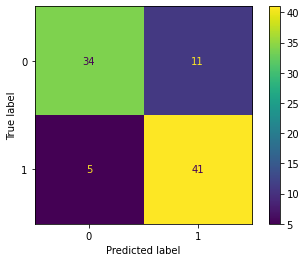

In [ ]:
plot_confusion_matrix(knn, x_test, y_test)

In [ ]:
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred, target_names=["yes", "no"]))

              precision    recall  f1-score   support

         yes       1.00      0.42      0.59        45
          no       0.64      1.00      0.78        46

    accuracy                           0.71        91
   macro avg       0.82      0.71      0.69        91
weighted avg       0.82      0.71      0.69        91



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


# NN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
nn = Sequential()
# input layer
nn.add(Dense(30,input_dim = 13, activation= 'tanh'))
# output layer
nn.add(Dense(1, activation= 'sigmoid'))
nn.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 30)                420       
                                                                 
 dense_34 (Dense)            (None, 1)                 31        
                                                                 
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nn.compile(loss = 'binary_crossentropy', optimizer= 'rmsprop', metrics= ['accuracy'])

In [ ]:
history = nn.fit(x_train, y_train, epochs=10, validation_split= 0.2)
# if i run this cell again model will continue where he stop

Epoch 1/10
6/6 [==============================] - 0s 14ms/step - loss: 0.2906 - accuracy: 0.8750 - val_loss: 0.5340 - val_accuracy: 0.7381
Epoch 2/10
6/6 [==============================] - 0s 7ms/step - loss: 0.2773 - accuracy: 0.8810 - val_loss: 0.5322 - val_accuracy: 0.7619
Epoch 3/10
6/6 [==============================] - 0s 7ms/step - loss: 0.2655 - accuracy: 0.8869 - val_loss: 0.5416 - val_accuracy: 0.7619
Epoch 4/10
6/6 [==============================] - 0s 8ms/step - loss: 0.2557 - accuracy: 0.8988 - val_loss: 0.5611 - val_accuracy: 0.7381
Epoch 5/10
6/6 [==============================] - 0s 8ms/step - loss: 0.2457 - accuracy: 0.8869 - val_loss: 0.5534 - val_accuracy: 0.7381
Epoch 6/10
6/6 [==============================] - 0s 7ms/step - loss: 0.2373 - accuracy: 0.8988 - val_loss: 0.5572 - val_accuracy: 0.7381
Epoch 7/10
6/6 [==============================] - 0s 7ms/step - loss: 0.2301 - accuracy: 0.8988 - val_loss: 0.5648 - val_accuracy: 0.7381
Epoch 8/10
6/6 [=================

In [ ]:
nn.evaluate(x_test, y_test) # return loss, acc

3/3 [==============================] - 0s 6ms/step - loss: 0.5125 - accuracy: 0.8242


[0.5124808549880981, 0.8241758346557617]

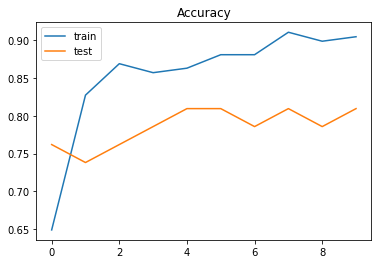

In [ ]:
# acc graph
plt.pyplot.title('Accuracy')
plt.pyplot.plot(history.history['accuracy'], label='train')
plt.pyplot.plot(history.history['val_accuracy'], label='test')
plt.pyplot.legend()

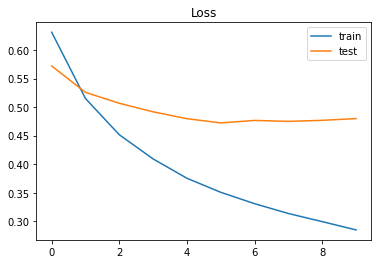

In [ ]:
# loss graph
plt.pyplot.title('Loss')
plt.pyplot.plot(history.history['loss'], label='train')
plt.pyplot.plot(history.history['val_loss'], label='test')
plt.pyplot.legend()



```
# The model in the way to overfit the data
```

 

